# Data Cleaning

## Overview of Dataset

'Report Number': official number of the report upon accident (irrelevant)  
'Local Case Number': assigned case number (irrelevant)  
'Agency Name': the name of the law enforcement or reporting agency (repeated)
'ACRS Report Type': description of the crash (data leakage)  
'Crash Date/Time': exact time of the crash  
'Route Type': different type of traffic roads (i.e. from county to state)  
'Road Name': road names of where the accident took place  
'Cross-Street Type': the street type that conjunct with the accdient road  
'Cross-Street Name': road names of cross-street that conujunct with the accident road  
'Off-Road Description': description of the functionality of the road where accdients took place (i.e. parking lot etc)  
'Municipality': the Municipality where the accident took place (repeated) 
'Related Non-Motorist': indicates if pedestrians, cyclists, or other non-motorists were involved (data leackage)  
'Collision Type': brief description of the how accident happen (data leackage)  
'Weather': categorical description of the weather  
'Surface Condition': condition of the road surface  
'Traffic Control': if traffic regulations such as stop sign exists  
'Driver Substance Abuse': categorise anything any chemicals that can effect the judgement of the drivers  
'Non-Motorist Substance Abuse': categorise anything any chemicals that can effect the judgement of the non-motorist  
'Person ID': number of official identification of the driver (irrelevant)  
'Driver At Fault': whether the driver is at fault for the accident  
'Injury Severity': how severe the injury is (y_variable)  
'Circumstance': a combinagtion of weather and traffic control (repeated)  
'Driver Distracted By': if the driver was distracted, if so and why  
'Drivers License State': where is driver is registered   
'Vehicle ID': chasis of the vehicle (irrelevant)  
'Vehicle Damage Extent': how damanged the vehecle is (data leackage)  
'Vehicle First Impact Location': first contact of the damaged vehicle (data leakage)  
'Vehicle Second Impact Location': second contact of the damanged vehicle (data leakage)  
'Vehicle Body Type': type of the car (i.e. 'PASSENGER CAR' 'PICKUP TRUCK')  
'Vehicle Movement': vehicle movement of the car during the accidient (data leakage)  
'Vehicle Continuing Dir': where the vehicle is going after the accident (data leackage)  
'Vehicle Going Dir': where the vehicle is going before the accident  
'Speed Limit': the posted speed limit on the road where the accident occurred.  
'Driverless Vehicle': Indicates if the vehicle was driverless or autonomous.  
'Parked Vehicle': indicates if a parked vehicle was involved in the accident  
'Vehicle Year': production year of the vehicle  
'Vehicle Make': brand of the vehicle  
'Vehicle Model': a specific model of the vehicle  
'Equipment Problems': Any vehicle equipment issues that might have contributed to the accident  
'Latitude': coordinate  
'Longitude': coordinate  
'Location': coordinate (repeated)  


## data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')#load dataset


pd.set_option('display.max_columns', None)
drivers = pd.read_csv('Drivers_Data.csv')
# Loop through each column in the DataFrame to print out the unique count and values for each variable
columns_dict = {}
for i in drivers.columns:
    num = len(drivers[i].unique())  
    var = drivers[i].unique()       
    columns_dict[i] = (num, var)


drivers['Timestamp'] = pd.to_datetime(drivers['Crash Date/Time'])
drivers['Month'] = drivers['Timestamp'].dt.month
drivers['Day'] = drivers['Timestamp'].dt.day
drivers['Hour'] = drivers['Timestamp'].dt.hour
drivers['Minute'] = drivers['Timestamp'].dt.minute
drivers['Seconnd'] = drivers['Timestamp'].dt.second

drivers_drop = drivers.drop(['Report Number', 'Local Case Number','Agency Name', 'ACRS Report Type', 'Related Non-Motorist', 'Collision Type',
                             'Person ID', 'Circumstance', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 
                             'Vehicle Movement', 'Vehicle Continuing Dir', 'Location', 'Crash Date/Time', 'Timestamp','Municipality',
                             'Related Non-Motorist', 'Off-Road Description', 'Non-Motorist Substance Abuse'], axis=1)


# Apply the mapping to the 'Injury Severity' col
injury_severity_mapping = {
    'NO APPARENT INJURY': 0,
    'SUSPECTED MINOR INJURY': 1,
    'POSSIBLE INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4}

drivers_drop['Injury Severity'] = drivers_drop['Injury Severity'].map(injury_severity_mapping)

print(drivers_drop['Injury Severity'].unique())

# Apply the mapping to the 'Injury Severity' column
weather_mapping = {
    'CLEAR': 1,
    'CLOUDY': 2,
    'RAINING': 3,
    'UNKNOWN': 4,
    'FOGGY': 5,
    'OTHER': 6,
    'SNOW': 7,
    'SLEET': 8,
    'WINTRY MIX': 9,
    'BLOWING SNOW': 10,
    'SEVERE WINDS': 11,
    'BLOWING SAND, SOIL, DIRT': 12
}

# Apply the mapping to the 'weather' column
drivers_drop['Weather'] = drivers_drop['Weather'].map(weather_mapping)

# Check the first few rows to verify the changes
print(drivers_drop['Weather'].unique())

surface_condition_mapping = {
    'UNKNOWN': 1,
    'DRY': 2,
    'WET': 3,
    'WATER(STANDING/MOVING)': 4,
    'MUD, DIRT, GRAVEL': 5,
    'ICE': 6,
    'SNOW': 7,
    'SLUSH': 8,
    'OTHER': 9,
    'OIL': 10,
    'SAND': 11
}

drivers_drop['Surface Condition'] = drivers_drop['Surface Condition'].map(surface_condition_mapping)

print(drivers_drop['Surface Condition'].unique())


[0 1 3 2 4]
[ 1.  2.  3. nan  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[nan  2.  3.  1.  4.  5.  6.  7.  8.  9. 10. 11.]


## Encoding

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Apply label encoding to categorical variables
LE = LabelEncoder()
df_encoded = drivers_drop.apply(lambda col: LE.fit_transform(col) if col.dtype == 'O' else col)

# Separate features and target variable
X = df_encoded.drop('Injury Severity', axis=1)
y = df_encoded['Injury Severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('splited')

train_dataset = pd.concat([X_train, y_train], axis=1)
test_dataset = pd.concat([X_test, y_test], axis=1)

print('imputing')

# Impute missing values in feature columns
train_impute = train_dataset.copy()
imputer = KNNImputer(n_neighbors=10)
train_imputed = imputer.fit_transform(train_impute)
train_imputed_df = pd.DataFrame(train_imputed, columns=train_impute.columns, index=train_impute.index)
nulls_train = train_imputed_df.isnull().sum().sum()
print("there are", nulls_train, "zeros in the train data")

test_impute = test_dataset.copy()
test_imputed = imputer.fit_transform(test_impute)
test_imputed_df = pd.DataFrame(test_imputed,columns=test_impute.columns, index=test_impute.index)
nulls_test = test_imputed_df.isnull().sum().sum()
print("there are", nulls_test, "zeros in the test data")
df_with_dummies = pd.concat([train_imputed_df, test_imputed_df], axis = 0)




splited
imputing
there are 0 zeros in the train data
there are 0 zeros in the test data


# Visualisation

<Axes: >

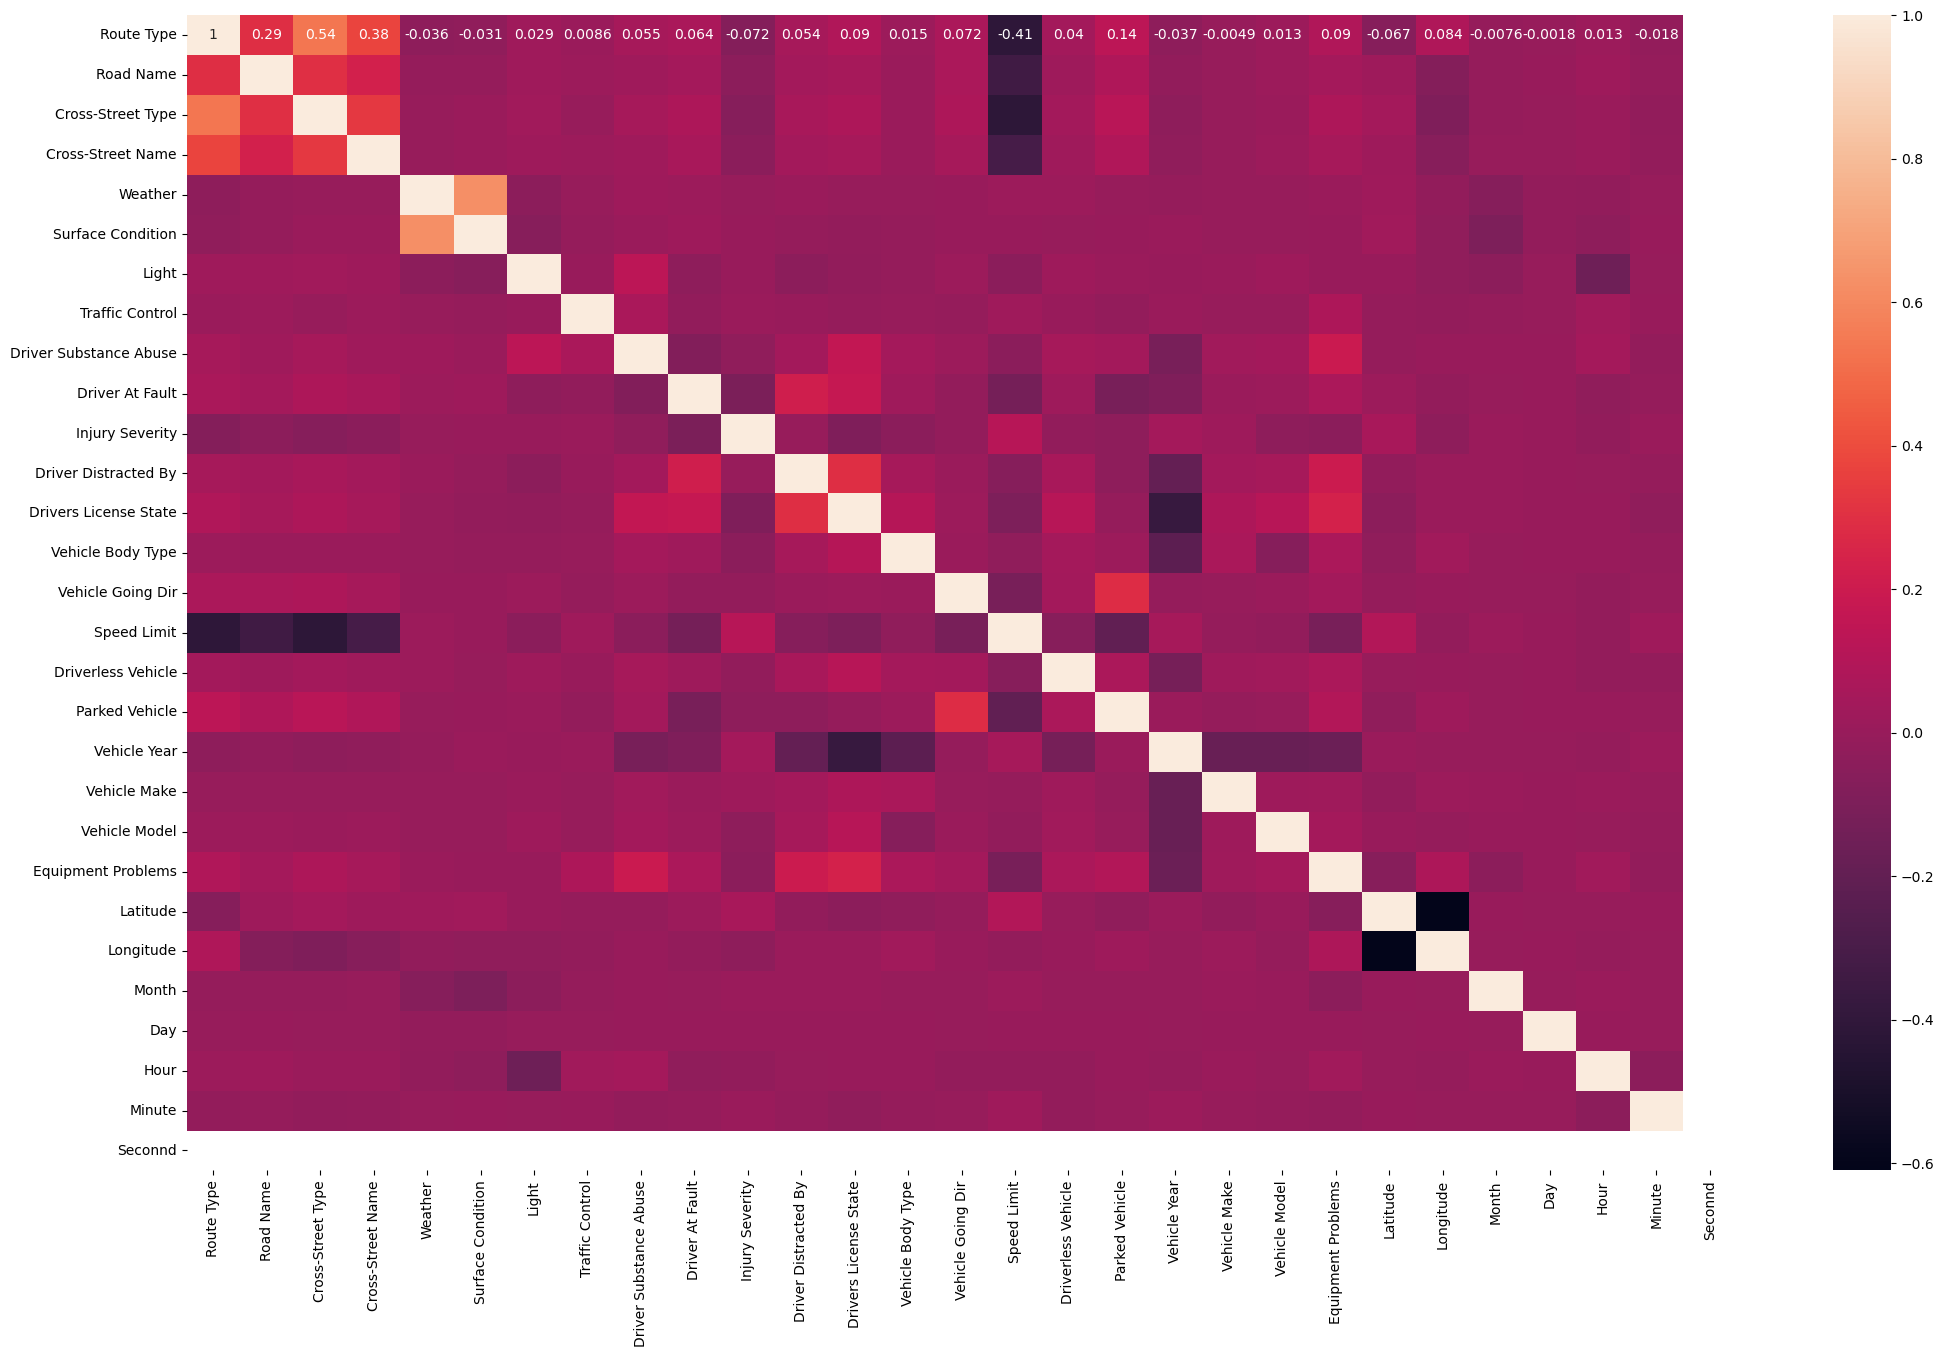

In [3]:
import seaborn as sns
plt.figure(figsize=[25,15])
sns.heatmap(df_encoded.corr(),annot=True)

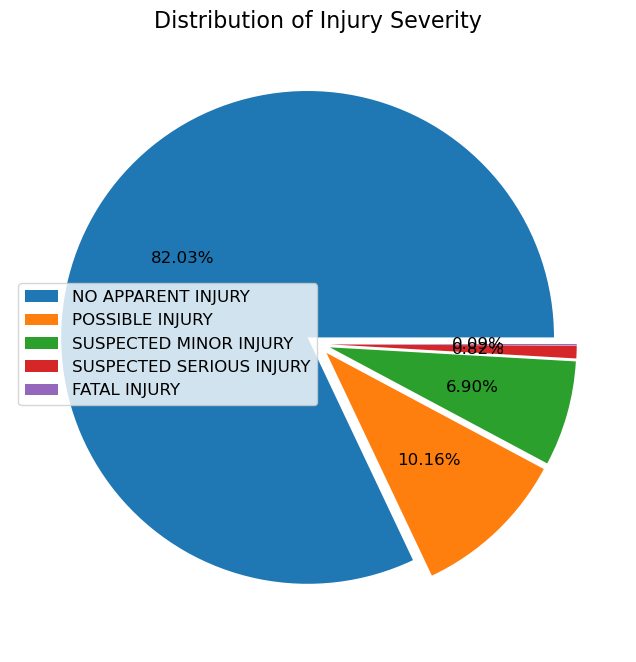

In [4]:
import matplotlib.pyplot as plt

# Get the counts and labels
counts = drivers['Injury Severity'].value_counts()
labels = counts.index

# Create a figure with a larger size
plt.figure(figsize=(12, 8))

# Plot the pie chart with exploded slices
explode = [0.05] * len(labels)  # Explode all slices slightly
plt.pie(x=counts.values,
        labels=None,  # Remove labels directly on the pie
        autopct='%2.2f%%',
        explode=explode,
        textprops={'fontsize': 12})  # Increase font size

# Add legend to show labels
plt.legend(labels, loc="best", fontsize=12)

plt.title('Distribution of Injury Severity', fontsize=16)  # Add title
plt.show()





# basic random forest

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Create a Random Forest classifier
# random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
# logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=1000)
# logistic_regression = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_regression = LogisticRegression(multi_class='ovr', max_iter=1000, penalty='l1', solver='liblinear', C=1.0)
# logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=1000,penalty='l2', C = 1.0)

# Separate features and target variable again
X_train_imputed = train_imputed_df.drop('Injury Severity', axis=1)
y_train_imputed = train_imputed_df['Injury Severity']

# Train the Random Forest classifier
logistic_regression.fit(X_train_imputed, y_train_imputed)

# Separate features and target variable for the test dataset
X_test_imputed = test_imputed_df.drop('Injury Severity', axis=1)
y_test_imputed = test_imputed_df['Injury Severity']

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_imputed)

# Calculate precision and recall
precision = precision_score(y_test_imputed, y_pred, average='weighted')
recall = recall_score(y_test_imputed, y_pred, average='weighted')
recall1 = recall_score(y_test_imputed, y_pred,average=None)

print("Precision:", precision)
print("Recall:", recall)
for i, recall in enumerate(recall1):
    print(f"Class {i}: Recall = {recall}")
# Calculate accuracy
accuracy = accuracy_score(y_test_imputed, y_pred)

print("Accuracy:", accuracy)


Precision: 0.6810107184014872
Recall: 0.8198483483919701
Class 0: Recall = 0.9996103436060928
Class 1: Recall = 0.0
Class 2: Recall = 0.0002878526194588371
Class 3: Recall = 0.0
Class 4: Recall = 0.0
Accuracy: 0.8198483483919701


no regularisation:

ovr:
Precision: 0.6726234783533916
Recall: 0.8201098166816769
Class 0: Recall = 0.999964576691463
Class 1: Recall = 0.0
Class 2: Recall = 0.0
Class 3: Recall = 0.0
Class 4: Recall = 0.0
Accuracy: 0.8201098166816769

multinomial:
Precision: 0.6810107184014872
Recall: 0.8198483483919701
Class 0: Recall = 0.9996103436060928
Class 1: Recall = 0.0
Class 2: Recall = 0.0002878526194588371
Class 3: Recall = 0.0
Class 4: Recall = 0.0
Accuracy: 0.8198483483919701

l1 regularison:
Precision: 0.6726234783533916
Recall: 0.8201098166816769
Class 0: Recall = 0.999964576691463
Class 1: Recall = 0.0
Class 2: Recall = 0.0
Class 3: Recall = 0.0
Class 4: Recall = 0.0
Accuracy: 0.8201098166816769

l2 regularison:
Precision: 0.6810107184014872
Recall: 0.8198483483919701
Class 0: Recall = 0.9996103436060928
Class 1: Recall = 0.0
Class 2: Recall = 0.0002878526194588371
Class 3: Recall = 0.0
Class 4: Recall = 0.0
Accuracy: 0.8198483483919701



In [23]:
from imblearn.over_sampling import SMOTE

# 创建SMOTE对象，指定采样策略和参数
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

# 对训练集进行过采样
X_train_imputed = train_imputed_df.drop('Injury Severity', axis=1)
y_train_imputed = train_imputed_df['Injury Severity']
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train_imputed)

clf1 = LogisticRegression(multi_class='ovr', max_iter=1000)
clf1.fit(X_train_resampled, y_train_resampled)

X_test_imputed = test_imputed_df.drop('Injury Severity', axis=1)
y_test_imputed = test_imputed_df['Injury Severity']

# 进行预测

y_pred1 = clf1.predict(X_test_imputed)
# Calculate precision and recall
precision = precision_score(y_test_imputed, y_pred1, average='weighted')
recall = recall_score(y_test_imputed, y_pred1, average='weighted')
recall1 = recall_score(y_test_imputed, y_pred1,average=None)
print("Precision:", precision)
print("Recall:", recall)

for i, recall in enumerate(recall1):
    print(f"Class {i}: Recall = {recall}")



# Calculate accuracy
accuracy = accuracy_score(y_test_imputed, y_pred1)
print("Accuracy:", accuracy)

Precision: 0.7527674769771867
Recall: 0.36625896981493855
Class 0: Recall = 0.38221749911441727
Class 1: Recall = 0.13625103220478943
Class 2: Recall = 0.4110535405872193
Class 3: Recall = 0.14963503649635038
Class 4: Recall = 0.8571428571428571
Accuracy: 0.36625896981493855


In [24]:
from imblearn.over_sampling import ADASYN

# 创建ADASYN对象，指定采样策略和参数
adasyn = ADASYN(random_state=511)

# 对训练集进行过采样
X_train_imputed = train_imputed_df.drop('Injury Severity', axis=1)
y_train_imputed = train_imputed_df['Injury Severity']
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_imputed, y_train_imputed)

clf1 = LogisticRegression(multi_class='ovr', max_iter=1000)
clf1.fit(X_train_resampled, y_train_resampled)

X_test_imputed = test_imputed_df.drop('Injury Severity', axis=1)
y_test_imputed = test_imputed_df['Injury Severity']

# 进行预测

y_pred2 = clf1.predict(X_test_imputed)
# Calculate precision and recall
precision = precision_score(y_test_imputed, y_pred2, average='weighted')
recall = recall_score(y_test_imputed, y_pred2, average='weighted')
recall1 = recall_score(y_test_imputed, y_pred2,average=None)
print("Precision:", precision)
print("Recall:", recall)

for i, recall in enumerate(recall1):
    print(f"Class {i}: Recall = {recall}")



# Calculate accuracy
accuracy = accuracy_score(y_test_imputed, y_pred2)
print("Accuracy:", accuracy)

Precision: 0.7521266495279235
Recall: 0.36050666744138754
Class 0: Recall = 0.37732908253630887
Class 1: Recall = 0.15483071841453344
Class 2: Recall = 0.38025331030512377
Class 3: Recall = 0.15693430656934307
Class 4: Recall = 0.8571428571428571
Accuracy: 0.36050666744138754
